# Pixel arrays: higher-order example

This notebook reproduces Exampe 2.4.2 from the pixel arrays paper
([arXiv:1609.00061](https://arxiv.org/abs/1609.00061)).

In [1]:
using Catlab, Catlab.CategoricalAlgebra.FinRelations
using CategoricalTensorNetworks

using Tullio

Base relations:

$$
\begin{aligned}
   R_1(w; y,x) &\iff \tan(y+w) + \exp(x) = 2 \\
   R_2(x,v; y) &\iff x^3 + \cos(\log(y^2)) = 1.5v \\
   R_3(w; v,z) &\iff w + z + 10^{-1} v = 0.5
\end{aligned}
$$

Create the pixel arrays.

In [2]:
n = 80
v = x = z = range(-3, 3, length=n)
w = y = range(-2.5, 2.5, length=n)
ϵ = 0.1

@tullio R1[i,j,k] := BoolRig(abs(tan(y[k] + w[i]) + exp(x[j]) - 2) < ϵ)
@tullio R2[i,j,k] := BoolRig(abs(x[j]^3 + cos(log(y[k]^2)) - 1.5v[i]) < ϵ)
@tullio R3[i,j,k] := BoolRig(abs(w[j] + z[k] + v[i]/10 - 0.5) < ϵ)

size(R1)

(80, 80, 80)

Create undirected wiring diagram for relational composition.

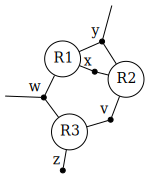

In [3]:
diagram = @relation (w,y) where (v,w,x,y,z) begin
  R1(w,x,y)
  R2(v,x,y)
  R3(v,w,z)
end

to_graphviz(diagram, box_labels=:name, junction_labels=:variable,
            port_labels=false)

This diagram corresponds to the tensor contraction expression:

In [4]:
gen_tensor_notation(diagram)

:(out[w, y] = R1[w, x, y] * R2[v, x, y] * R3[v, w, z])

Evaluate this tensor network using
[Tullio.jl](https://github.com/mcabbott/Tullio.jl).

In [5]:
R = @contract_tensors_with diagram @tullio;

Plot the result.

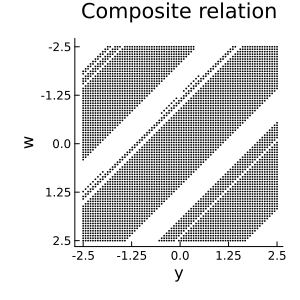

In [6]:
using Plots

plot_rel(m::AbstractMatrix{BoolRig}; kw...) =
  plot(spy(map(x -> x.value, m)); kw...)

ticks = range(1, n, length=5)
ticklabels = range(minimum(w), maximum(w), length=length(ticks))
plot_rel(R, title="Composite relation", xlabel="y", ylabel="w",
         size=(300,300), lims=(0,n), ticks=(ticks,ticklabels))